In [1]:
#!pip install scikit-learn

In [2]:
#!pip install geopandas

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed, IntSlider
from sklearn.metrics import pairwise_distances_argmin
import geopandas as gpd
# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [22]:
demograph_data = gpd.read_file('../Clean Data/demographic_data_clean_for_clustering.csv') 
#data = pd.read_csv('demographic_data_clean_for_clustering')
demograph_data.head(1000)

index       Category                                        Subcategory  \
0       0     Population                                        Total - Age   
1       1     Population                                        Total - Age   
2       2     Population                                        Total - Age   
3       3     Population                                        Total - Age   
4       4     Population                                        Total - Age   
..    ...            ...                                                ...   
995   995  Ethnocultural  Total - Ethnic or cultural origin for the popu...   
996   996  Ethnocultural  Total - Ethnic or cultural origin for the popu...   
997   997  Ethnocultural  Total - Ethnic or cultural origin for the popu...   
998   998  Ethnocultural  Total - Ethnic or cultural origin for the popu...   
999   999  Ethnocultural  Total - Ethnic or cultural origin for the popu...   

             Grouping  Toronto  Ward 1  Ward 2  Ward 3  Ward 4  Ward 5  \
0         Total - Age  2761285  115120  117200  139920  104715  115675   
1        0 to 4 years   123385    5755    5105    6765    4770    6045   
2        5 to 9 years   128805    6160    5825    6180    5015    6060   
3      10 to 14 years   131150    6585    6370    5515    5230    6360   
4      15 to 19 years   133820    7085    6540    5160    4680    6390   
..                ...      ...     ...     ...     ...     ...     ...   
995      Cree, n.o.s.     1380      15      40      90     105      50   
996            Korean    42200     500    1890    2365     835     375   
997          Romanian    20010     280    1125    1080     835     210   
998          Lebanese    11530     155     485     625     490     215   
999           Iranian    37895     260     615    1165     425     175   

     Ward 6  Ward 7  Ward 8  Ward 9 Ward 10 Ward 11 Ward 12 Ward 13 Ward 14  \
0    107355  111200  114820  104730  135400  102385  114095  116930  104555   
1      5265    5785    5835    4665    4420    3130    4520    3720    5350   
2      5205    6205    6205    4430    2765    2900    4345    3135    5775   
3      5085    6780    7075    4005    2085    2950    4595    2455    5060   
4      5705    7175    7220    3895    2195    3490    4485    3445    4200   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995      25      20      30      90      55      75      85      85     150   
996    1630     555    1315     910    2475    2285    1975    2570     740   
997    1100     170    1495     600    1060     810    1575     670     670   
998     235     190     370     365    1165     650     460     625     580   
999    1275     165    1120     415    2180    1360    1970    1425     430   

    Ward 15 Ward 16 Ward 17 Ward 18 Ward 19 Ward 20 Ward 21 Ward 22 Ward 23  \
0    101025   94335  112590  117130  108500  110095  111560  103690   94025   
1      4615    4600    4375    4525    6035    5610    5165    4000    3770   
2      5915    4755    4780    4480    6455    6230    5880    4480    4660   
3      6770    5225    5010    4425    6195    6285    5920    4815    4665   
4      6665    5225    5090    5035    5480    6425    6440    4930    4750   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995      35      10      15      15     150      75      50      40      10   
996    1715    1380    4195   11050     815     505     525     790     225   
997    1240    1480    1735    1015     870     490     385     285     155   
998     430     785     480     400     370     250    1135     465     115   
999    3290    1800    6485   10370     615     490     475     645     185   

    Ward 24 Ward 25  
0    102755  101485  
1      5195    4365  
2      5890    5080  
3      6090    5590  
4      6030    6105  
..      ...     ...  
995      50      15  
996     285     300  
997     355     315  
998     195     300  
999     305     255  

[10

In [23]:
#Reset the index and turn the old index into a column before transposing
demograph_data = demograph_data.reset_index()

#Drop disruptive columns
demograph_data = demograph_data.drop(columns=['index', 'Category', 'Subcategory'])

#Set the correct 'Grouping' column as the index
demograph_data = demograph_data.set_index('Grouping')

#Now transpose the DataFrame, which will make the rows into columns
demograph_data = demograph_data.T

#Drop the row for 'Toronto' after transposing 
tdemograph_data = demograph_data.drop(index=['Toronto'])

#Display the new DataFrame
tdemograph_data

Grouping Total - Age   0 to 4 years   5 to 9 years   10 to 14 years  \
level_0            0              1              2                3   
Ward 1        115120           5755           6160             6585   
Ward 2        117200           5105           5825             6370   
Ward 3        139920           6765           6180             5515   
Ward 4        104715           4770           5015             5230   
Ward 5        115675           6045           6060             6360   
Ward 6        107355           5265           5205             5085   
Ward 7        111200           5785           6205             6780   
Ward 8        114820           5835           6205             7075   
Ward 9        104730           4665           4430             4005   
Ward 10       135400           4420           2765             2085   
Ward 11       102385           3130           2900             2950   
Ward 12       114095           4520           4345             4595   
Ward 13       116930           3720           3135             2455   
Ward 14       104555           5350           5775             5060   
Ward 15       101025           4615           5915             6770   
Ward 16        94335           4600           4755             5225   
Ward 17       112590           4375           4780             5010   
Ward 18       117130           4525           4480             4425   
Ward 19       108500           6035           6455             6195   
Ward 20       110095           5610           6230             6285   
Ward 21       111560           5165           5880             5920   
Ward 22       103690           4000           4480             4815   
Ward 23        94025           3770           4660             4665   
Ward 24       102755           5195           5890             6090   
Ward 25       101485           4365           5080             5590   

Grouping   15 to 19 years   20 to 24 years   25 to 29 years   30 to 34 years  \
level_0                 4                5                6                7   
Ward 1               7085             9645            10095             8125   
Ward 2               6540             6600             6820             6755   
Ward 3               5160             7040            11455            13980   
Ward 4               4680             4550             7690            10640   
Ward 5               6390             7490             8205             8450   
Ward 6               5705             7225             7840             7570   
Ward 7               7175             9380             8750             7460   
Ward 8               7220             7145             6975             7575   
Ward 9               3895             5595             9930            12345   
Ward 10              2195            10385            28800            27255   
Ward 11              3490             9715            13380            11965   
Ward 12              4485             5840            10945            12845   
Ward 13              3445            12140            17365            16335   
Ward 14              4200             4855             6620             9015   
Ward 15              6665             6035             5910             6495   
Ward 16              5225             5660             6735             6820   
Ward 17              5090             7610            10450             9870   
Ward 18              5035             8180            11500            11985   
Ward 19              5480             5295             6085             7760   
Ward 20              6425             7060             7285             7380   
Ward 21              6440             8155             8935             8055   
Ward 22              4930             6715             7605             7025   
Ward 23              4750             6835             7150             6595   
Ward 24              6030             7820             8560             7245   
Wa

In [24]:
pd.set_option('display.max_columns', None)

demograph_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, level_0 to Ward 25
Columns: 1482 entries, Total - Age to     Other government transfers %
dtypes: object(1482)
memory usage: 313.9+ KB


In [25]:
type(demograph_data)

pandas.core.frame.DataFrame

In [26]:
column_names = demograph_data.columns.tolist()
print(column_names)
#remember to remove the spaces in the column names

['Total - Age', '  0 to 4 years', '  5 to 9 years', '  10 to 14 years', '  15 to 19 years', '  20 to 24 years', '  25 to 29 years', '  30 to 34 years', '  35 to 39 years', '  40 to 44 years', '  45 to 49 years', '  50 to 54 years', '  55 to 59 years', '  60 to 64 years', '  65 to 69 years', '  70 to 74 years', '  75 to 79 years', '  80 to 84 years', '  85 to 89 years', '  90 years and over', 'Median age', 'Total - Occupied private dwellings by structural type of dwelling - 25% sample data', '  Single-detached house', '  Semi-detached house', '  Row house', '  Apartment or flat in a duplex', '  Apartment in a building that has fewer than five storeys', '  Apartment in a building that has five or more storeys', '  Other single-attached house', '  Movable dwelling', 'Total - Tenure (includes band housing)', '  Owned', '    Part of a condominium', '    Not part of a condominium', '  Rented', '    Part of a condominium', '    Not part of a condominium', 'Total - Occupied private dwellings b

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize = (7, 7))

# fig.subplots_adjust(wspace = 0.15)

# sns.scatterplot(data = tdemograph_data, x = '    Employed', y = '  20 to 24 years', hue = '  20 to 24 years') #Should there be multiple graphs? Or is this where the dendrogram comes in?

# ax.set_xlabel('Employed', fontsize = 16)

# ax.set_ylabel('Income', fontsize = 16)


In [27]:
tdemograph_data.dtypes

Grouping
Total - Age                                                                    object
  0 to 4 years                                                                 object
  5 to 9 years                                                                 object
  10 to 14 years                                                               object
  15 to 19 years                                                               object
                                                                                ...  
    Canada Pension Plan (CPP) and QuÃšbec Pension Plan (QPP) benefits %        object
    Old Age Security pension (OAS) and Guaranteed Income Supplement (GIS) %    object
    Employment Insurance (EI) benefits %                                       object
    Child benefits $                                                           object
    Other government transfers %                                               object
Length: 1482, dtype: object

In [ ]:
#tdemograph_data = tdemograph_data.apply(pd.to_numeric, errors='coerce')

#Checking data types
print(tdemograph_data.dtypes)

In [ ]:
tdemograph_data.to_csv('C:/Users/amirv/OneDrive/Desktop/bigproject/transposed_data.csv', index=False)

In [28]:
tdemograph_data = tdemograph_data.fillna(0) #Replace NaN values with 0

In [29]:
tdemograph_data.head(25)

Grouping Total - Age   0 to 4 years   5 to 9 years   10 to 14 years  \
level_0            0              1              2                3   
Ward 1        115120           5755           6160             6585   
Ward 2        117200           5105           5825             6370   
Ward 3        139920           6765           6180             5515   
Ward 4        104715           4770           5015             5230   
Ward 5        115675           6045           6060             6360   
Ward 6        107355           5265           5205             5085   
Ward 7        111200           5785           6205             6780   
Ward 8        114820           5835           6205             7075   
Ward 9        104730           4665           4430             4005   
Ward 10       135400           4420           2765             2085   
Ward 11       102385           3130           2900             2950   
Ward 12       114095           4520           4345             4595   
Ward 13       116930           3720           3135             2455   
Ward 14       104555           5350           5775             5060   
Ward 15       101025           4615           5915             6770   
Ward 16        94335           4600           4755             5225   
Ward 17       112590           4375           4780             5010   
Ward 18       117130           4525           4480             4425   
Ward 19       108500           6035           6455             6195   
Ward 20       110095           5610           6230             6285   
Ward 21       111560           5165           5880             5920   
Ward 22       103690           4000           4480             4815   
Ward 23        94025           3770           4660             4665   
Ward 24       102755           5195           5890             6090   

Grouping   15 to 19 years   20 to 24 years   25 to 29 years   30 to 34 years  \
level_0                 4                5                6                7   
Ward 1               7085             9645            10095             8125   
Ward 2               6540             6600             6820             6755   
Ward 3               5160             7040            11455            13980   
Ward 4               4680             4550             7690            10640   
Ward 5               6390             7490             8205             8450   
Ward 6               5705             7225             7840             7570   
Ward 7               7175             9380             8750             7460   
Ward 8               7220             7145             6975             7575   
Ward 9               3895             5595             9930            12345   
Ward 10              2195            10385            28800            27255   
Ward 11              3490             9715            13380            11965   
Ward 12              4485             5840            10945            12845   
Ward 13              3445            12140            17365            16335   
Ward 14              4200             4855             6620             9015   
Ward 15              6665             6035             5910             6495   
Ward 16              5225             5660             6735             6820   
Ward 17              5090             7610            10450             9870   
Ward 18              5035             8180            11500            11985   
Ward 19              5480             5295             6085             7760   
Ward 20              6425             7060             7285             7380   
Ward 21              6440             8155             8935             8055   
Ward 22              4930             6715             7605             7025   
Ward 23              4750             6835             7150             6595   
Ward 24              6030             7820             8560             7245   

Grouping   35 to 39 years   40 to 44 years   45 to 49 years   50 to 54 y

In [33]:
tdemograph_data = demograph_data.drop(index = ['level_0'])
tdemograph_data = demograph_data.drop(index = ['Toronto'])
tdemograph_data

Grouping Total - Age   0 to 4 years   5 to 9 years   10 to 14 years  \
level_0            0              1              2                3   
Ward 1        115120           5755           6160             6585   
Ward 2        117200           5105           5825             6370   
Ward 3        139920           6765           6180             5515   
Ward 4        104715           4770           5015             5230   
Ward 5        115675           6045           6060             6360   
Ward 6        107355           5265           5205             5085   
Ward 7        111200           5785           6205             6780   
Ward 8        114820           5835           6205             7075   
Ward 9        104730           4665           4430             4005   
Ward 10       135400           4420           2765             2085   
Ward 11       102385           3130           2900             2950   
Ward 12       114095           4520           4345             4595   
Ward 13       116930           3720           3135             2455   
Ward 14       104555           5350           5775             5060   
Ward 15       101025           4615           5915             6770   
Ward 16        94335           4600           4755             5225   
Ward 17       112590           4375           4780             5010   
Ward 18       117130           4525           4480             4425   
Ward 19       108500           6035           6455             6195   
Ward 20       110095           5610           6230             6285   
Ward 21       111560           5165           5880             5920   
Ward 22       103690           4000           4480             4815   
Ward 23        94025           3770           4660             4665   
Ward 24       102755           5195           5890             6090   
Ward 25       101485           4365           5080             5590   

Grouping   15 to 19 years   20 to 24 years   25 to 29 years   30 to 34 years  \
level_0                 4                5                6                7   
Ward 1               7085             9645            10095             8125   
Ward 2               6540             6600             6820             6755   
Ward 3               5160             7040            11455            13980   
Ward 4               4680             4550             7690            10640   
Ward 5               6390             7490             8205             8450   
Ward 6               5705             7225             7840             7570   
Ward 7               7175             9380             8750             7460   
Ward 8               7220             7145             6975             7575   
Ward 9               3895             5595             9930            12345   
Ward 10              2195            10385            28800            27255   
Ward 11              3490             9715            13380            11965   
Ward 12              4485             5840            10945            12845   
Ward 13              3445            12140            17365            16335   
Ward 14              4200             4855             6620             9015   
Ward 15              6665             6035             5910             6495   
Ward 16              5225             5660             6735             6820   
Ward 17              5090             7610            10450             9870   
Ward 18              5035             8180            11500            11985   
Ward 19              5480             5295             6085             7760   
Ward 20              6425             7060             7285             7380   
Ward 21              6440             8155             8935             8055   
Ward 22              4930             6715             7605             7025   
Ward 23              4750             6835             7150             6595   
Ward 24              6030             7820             8560             7245   
Wa

In [ ]:
#Converts values to numeric as there are columns with non-numeric values still 
tdemograph_data = tdemograph_data.apply(pd.to_numeric, errors='coerce')
print(tdemograph_data)
tdemograph_data.fillna(0)
tdemograph_data_clean = tdemograph_data.dropna(axis=1, how='any')
tdemograph_data_clean.to_csv('C:/Users/amirv/OneDrive/Desktop/bigproject/cleaned_t_data.csv')
#Drop columns with NaN values
print(tdemograph_data_clean.dtypes)
tdemograph_data_clean.head()
#Standardize the data 

In [ ]:
selected_columns = ['  0 to 4 years', '  5 to 9 years', '  10 to 14 years', '  15 to 19 years', '  20 to 24 years', '  25 to 29 years', '  30 to 34 years', 
                    '  35 to 39 years', '  40 to 44 years', '  45 to 49 years', '  50 to 54 years', 
                    '  55 to 59 years', '  60 to 64 years', '  65 to 69 years', '  70 to 74 years', '  75 to 79 years', 
                    '  80 to 84 years', '  85 to 89 years', '  90 years and over', 
                    '  1960 or before', '  1961 to 1980', '  1981 to 1990', '  1991 to 2000', '  2001 to 2005', '  2006 to 2010', 
                    '  2011 to 2015', '  2016 to 2021', '  Non-immigrants', '  Immigrants', '  Americas', '  Europe', '  Africa', '  Asia',
                    '    Official languages', '    Non-official languages', '          Semitic languages', '        Austro-Asiatic languages',
                    '            Slavic languages', '          Germanic languages', '          Indo-Iranian languages', '        Niger-Congo languages',  '          Chinese languages', 
                    '  No certificate, diploma or degree', '  High (secondary) school diploma or equivalency certificate', '  Postsecondary certificate, diploma or degree', '    Postsecondary certificate or diploma below bachelor level', 
                    '      Apprenticeship or trades certificate or diploma',  
                    '        Non-apprenticeship trades certificate or diploma', '        Apprenticeship certificate', '      College, CEGEP or other non-university certificate or diploma',  
                    '      University certificate or diploma below bachelor level', '    Employed', '    Unemployed', '  Not in the labour force', '    1 Business, finance and administration occupations',
                    '    2 Natural and applied sciences and related occupations', '    3 Health occupations', '    4 Occupations in education, law and social, community and government services', '    5 Occupations in art, culture, recreation and sport',
                    '    7 Trades, transport and equipment operators and related occupations', '    23 Construction', '  Under $5,000', '  $5,000 to $9,999', '  $10,000 to $14,999', '  $15,000 to $19,999', '  $20,000 to $24,999', '  $25,000 to $29,999', 
                    '  $30,000 to $34,999', '  $35,000 to $39,999', '  $40,000 to $44,999', '  $45,000 to $49,999', '  $50,000 to $59,999', '  $60,000 to $69,999', '  $70,000 to $79,999', '  $80,000 to $89,999', '  $90,000 to $99,999', '  $100,000 and over', 
                    '  Average total income of households in 2020 ($)', '  Average monthly shelter costs for owned dwellings ($)', '    Average total income in 2020 among recipients ($)', 
                    '  % of owner households spending 30% or more of its income on shelter costs']

tdemograph_data_clean= tdemograph_data_clean[selected_columns] #couldn't add "' Bachelor's degree'", 'University certificate or diploma above bachelor level' yet


In [34]:
tdemograph_data_clean #whys is there a row called level_0?

Grouping    0 to 4 years    5 to 9 years    10 to 14 years    15 to 19 years  \
level_0                1               2                 3                 4   
Ward 1              5755            6160              6585              7085   
Ward 2              5105            5825              6370              6540   
Ward 3              6765            6180              5515              5160   
Ward 4              4770            5015              5230              4680   
Ward 5              6045            6060              6360              6390   
Ward 6              5265            5205              5085              5705   
Ward 7              5785            6205              6780              7175   
Ward 8              5835            6205              7075              7220   
Ward 9              4665            4430              4005              3895   
Ward 10             4420            2765              2085              2195   
Ward 11             3130            2900              2950              3490   
Ward 12             4520            4345              4595              4485   
Ward 13             3720            3135              2455              3445   
Ward 14             5350            5775              5060              4200   
Ward 15             4615            5915              6770              6665   
Ward 16             4600            4755              5225              5225   
Ward 17             4375            4780              5010              5090   
Ward 18             4525            4480              4425              5035   
Ward 19             6035            6455              6195              5480   
Ward 20             5610            6230              6285              6425   
Ward 21             5165            5880              5920              6440   
Ward 22             4000            4480              4815              4930   
Ward 23             3770            4660              4665              4750   
Ward 24             5195            5890              6090              6030   
Ward 25             4365            5080              5590              6105   

Grouping    20 to 24 years    25 to 29 years    30 to 34 years  \
level_0                  5                 6                 7   
Ward 1                9645             10095              8125   
Ward 2                6600              6820              6755   
Ward 3                7040             11455             13980   
Ward 4                4550              7690             10640   
Ward 5                7490              8205              8450   
Ward 6                7225              7840              7570   
Ward 7                9380              8750              7460   
Ward 8                7145              6975              7575   
Ward 9                5595              9930             12345   
Ward 10              10385             28800             27255   
Ward 11               9715             13380             11965   
Ward 12               5840             10945             12845   
Ward 13              12140             17365             16335   
Ward 14               4855              6620              9015   
Ward 15               6035              5910              6495   
Ward 16               5660              6735              6820   
Ward 17               7610             10450              9870   
Ward 18               8180             11500             11985   
Ward 19               5295              6085              7760   
Ward 20               7060              7285              7380   
Ward 21               8155              8935              8055   
Ward 22               6715              7605              7025   
Ward 23               6835              7150              6595   
Ward 24               7820              8560              7245   
Ward 25               7585              7540              6140   

Grouping    35 to 39 years    40 to 44 years    45 to 49

In [ ]:

#Standardize the data 
#scaler = StandardScaler()
#demograph_scaled = scaler.fit_transform(tdemograph_data_clean)
#demograph_scaled

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

#Apply scaling to columns 
num_cols = tdemograph_data_clean.columns
tdemograph_data_clean[num_cols] = scaler.fit_transform(tdemograph_data_clean[num_cols])

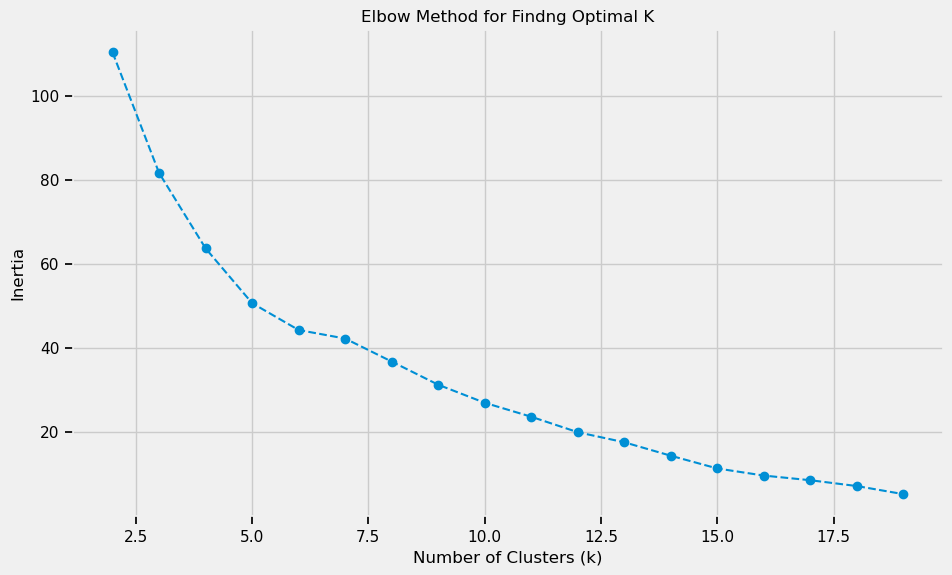

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [37]:
#Use the Elbow method to find number of clusters needed
inertia = []
k_range = range(2, 20)  #Test for different number of clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tdemograph_data_clean)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Findng Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

#Choose an optimal number of clusters based on the Elbow Curve
optimal_k = 5  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters = optimal_k, random_state = 42, n_init = 100)
tdemograph_data_clean['Cluster'] = kmeans.fit_predict(tdemograph_data_clean)
tdemograph_data_clean['Cluster'] = tdemograph_data_clean['Cluster'].astype(int)

#Ensure 'Cluster' column is numeric
tdemograph_data_clean['Cluster'] = pd.to_numeric(tdemograph_data_clean['Cluster'], errors = 'coerce')
#print(tdemograph_data_clean.isnull().sum())

#Use only numeric columns for pairplot 
num_cols = tdemograph_data_clean.select_dtypes(include=np.number).columns.tolist()
num_cols = [col for col in num_cols if col != 'Cluster']
# Visualize clusters with pairplot, using 'Cluster' for hue

#tdemograph_data_clean[num_cols] = tdemograph_data_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')
tdemograph_data_clean = tdemograph_data.dropna(axis=0, how='any')

sns.scatterplot(tdemograph_data_clean, hue='Cluster', palette='blue') #[num_cols + ['Cluster']]
plt.title("Cluster Pairplot")
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.subplots_adjust(wspace=0.15)
sns.scatterplot(data = tdemograph_data_clean, x='Employed', y='Ages 25 - 29', hue = agglomerative.labels_)
ax.legend(loc = 2, fontsize = 14)
ax.set_xlabel('Employed', fontsize = 16)
ax.set_ylabel('Ages 25 - 29', fontsize = 16);

#tdemograph_data_clean = tdemograph_data_clean.dropna(subset=numeric_cols + ['Cluster'])
#tdemograph_data_clean[numeric_cols] = tdemograph_data_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
tdemograph_data_clean

In [ ]:
correlation_matrix = tdemograph_data_clean.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")

In [ ]:
print("Numeric columns:", numeric_cols)
